# Jaccard-Index versus Accuracy

Depending on the use-case some metrics are sub-optimal for determining segmentation quality. We demonstrate this by comparing segmentation results on differently cropped images.

See also:
* [Maier-Hein, Reinke et al. (Arxiv 2023). Metrics reloaded: Pitfalls and recommendations for image analysis validation
](https://arxiv.org/abs/2206.01653)

In [1]:
from skimage.data import human_mitosis
from the_segmentation_game import metrics
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview

C:\Users\rober\miniforge3\envs\bio9\lib\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


We use the `human_mitosis` example dataset from scikit-image.

[[10 11  9 ... 11 11 10]
 [10 10 11 ... 12 12 11]
 [ 9  9 10 ... 12 11 11]
 ...
 [10  9  9 ... 11 12 11]
 [10 10 10 ... 13 12 12]
 [10 10 10 ... 13 13 13]]
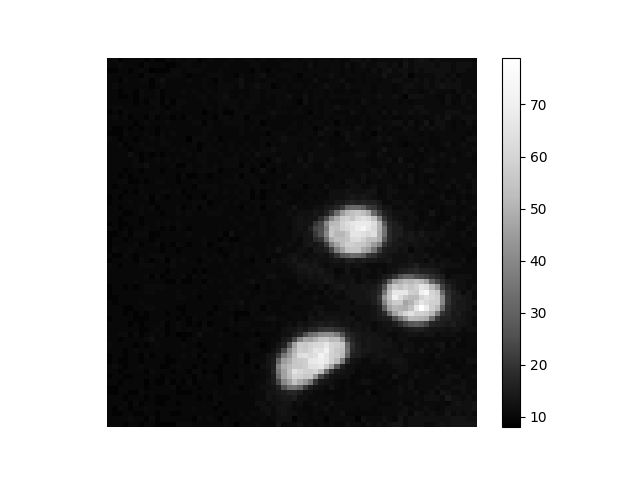
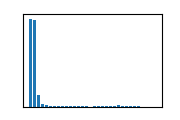

In [2]:
image = human_mitosis()[95:165, 384:454]

stackview.insight(image)

Let's assume this is a reference annotation performed by an expert.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
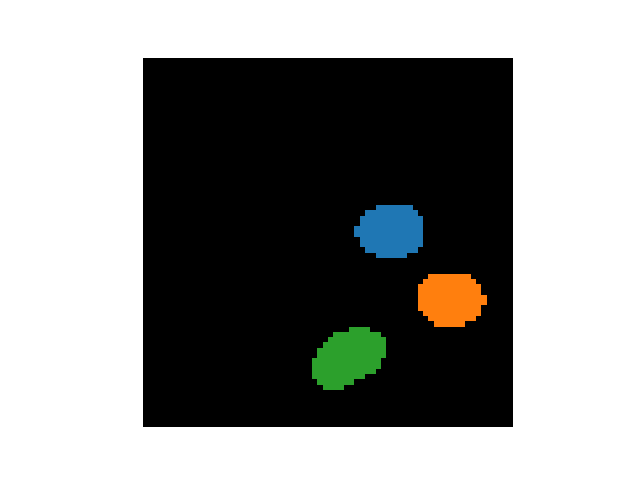

In [3]:
reference_labels = nsbatwm.voronoi_otsu_labeling(image)
reference_labels

Furthermore, this create a segmentation result we would like to determine the quality of.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
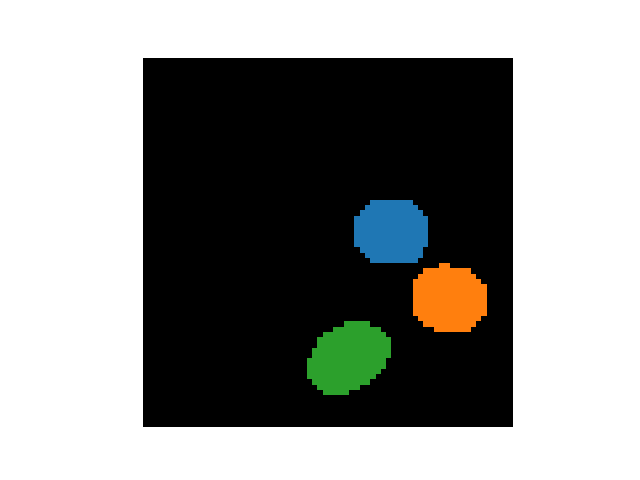

In [4]:
test_labels = nsbatwm.gauss_otsu_labeling(image, outline_sigma=3)

test_labels

## Quality measurement
There are plenty of quality metrics for measuring how well the two label images fit to each other. In the following we use [accuracy and jaccard index as implemented in The Segmentation Game](https://github.com/haesleinhuepf/the-segmentation-game#metrics), a napari-plugin for measuring quality metrics of segmentation results.

In [5]:
metrics.roc_accuracy_binary(reference_labels, test_labels)

0.9744898

In [6]:
metrics.jaccard_index_sparse(reference_labels, test_labels)

0.7274754206261056

We will now apply the same metrics to the label image again, but crop the label image by removing some of the zero-value pixels in the top and left of the label image.

In [7]:
metrics.roc_accuracy_binary(reference_labels[20:,20:], test_labels[20:,20:])

0.95

In [8]:
metrics.jaccard_index_sparse(reference_labels[20:,20:], test_labels[20:,20:])

0.7274754206261056

As you can see, the accuracy metric changes, while the Jaccard Index does not. Obviously the accuracy metric depends on the amount of zero-value pixels in the label image. We just visualize the cropped images:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
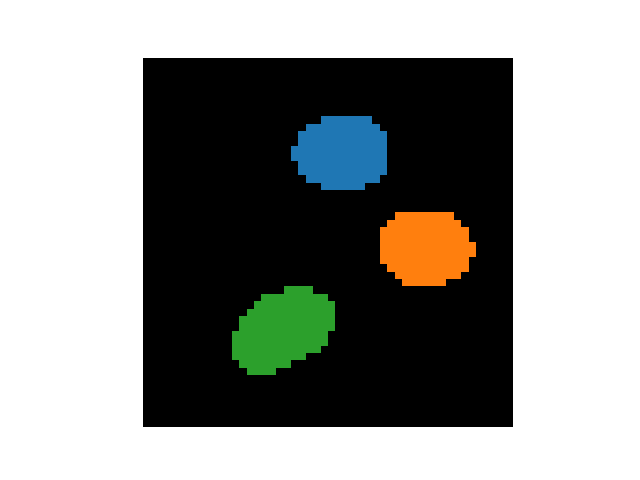

In [9]:
reference_labels[20:,20:]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
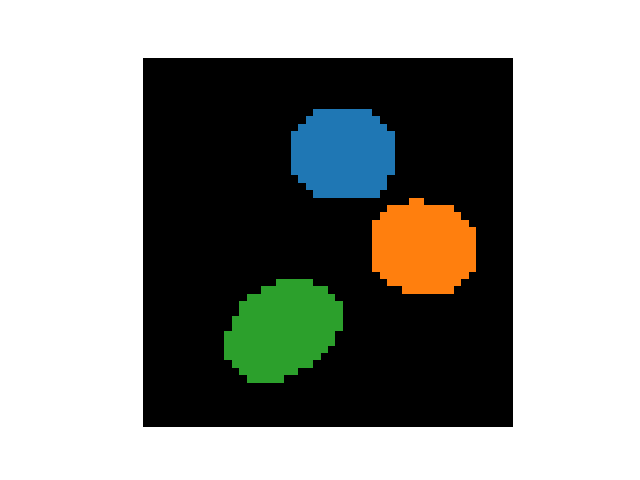

In [10]:
test_labels[20:,20:]

## Explanation
When comparing the equations of accuracy $A$ and Jaccard index $J$, it is obvious that both do the same kind-of, but only accuracy includes the number of zero-value pixels in both label images. These pixels are the true-negatives $TN$.

$$
  A =\frac{TP + TN}{FN + FP + TP + TN}
$$

$$
  J =\frac{TP}{FN + FP + TP}
$$

## Exercise
Compute the [Dice coefficient](https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient) of `test_labels` compared to `reference_labels`.